# <a id ='home'>Predictive Model for Targeted Customer Engagement</a>

## Introduction

I am thrilled to present to you my portfolio project, a comprehensive analysis of marketing campaigns that delves into the intricacies of consumer behavior and the effectiveness of various strategies employed. As a passionate data enthusiast, I've embarked on this journey to showcase my skills in data exploration, analysis, and interpretation.

In this portfolio project, I explore the multifaceted world of marketing campaigns, dissecting data to uncover patterns, trends, and insights that inform strategic decision-making. Leveraging a combination of exploratory data analysis, visualization techniques, and utilizing machine learning for predictive insights.

Join me on this journey as we navigate through the data landscape, unraveling the stories hidden within the numbers. This portfolio project is not just a showcase of technical skills; it's a testament to my passion for data-driven decision-making and my dedication to providing valuable insights that drive business success.

I invite you to explore the pages ahead and witness how data transforms into knowledge, empowering strategic decision-making in the dynamic realm of marketing.


## Background 

As the year-end sale approaches, a major retail store is gearing up for an exciting promotion. Introducing a novel incentive - __the gold membership__, offering an exclusive 20% discount on all transactions. This premium membership, typically priced at \\$999 on regular days, is now available at a special rate of $499. The offer is exclusively tailored for existing customers. To streamline promotional efforts and minimize campaign costs, the management is actively strategizing a phone call outreach initiative. The goal is to develop  a predictive model capable of identifying potential customers who will likely accept the offer so that they can be contacted directly to save campaign cost.

## Objective
The key objective is to develop a predictive model capable of identifying potential customers likely to embrace this enticing gold membership offer. 


In a scenario where the superstore wants to capture as many potential customers as possible who are likely to purchase the gold membership, we will focus on minimizing not predicting a response when someone would have responded, i.e., the false negative. Although in a real world scenario, we need to contact the marketing team to know the cost of predicting a response when the customer won't respond. In this project I will take into account model that capture as many potential customers as possible  and also balances between this two discrepancies .

To achieve the objective of project the steps highlighted below will be used:
1. [Dataset description](#data-dataset)
2. [Importing Libraries](#data-import)
3. [Loading dataset and Dataset Overview](#data-load)
4. [Data Cleaning and Exploration](#data-eda)
5. [Feature Engineering](#data-eng)
6. [Outlier Detection & Removal](#data-out)
7. [Data Preprocessing](#data-prep)
8. [Model Selection,Evaluation & Comparison](#data-model)
9. [Feature Importances Analysis](#data-feat)
10. [Conclusion](#data-con)

## <a id='data-dataset'>1. About The Dataset    </a>


This data was gathered during the last 2 years campaign by the marketing team for 2240 customer wo either accept or reject the offer.The dataset is a kaggle competition dataset available  [Here](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset).

Data feature description is as follows;

- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise
- **ID** - Unique ID of each customer
- **Year_Birth** - year birth of the customer
- **Complain** - 1 if the customer complained in the last 2 years
- **Dt_Customer** - date of customer's enrollment with the company
- **Education** - customer's level of education
- **Marital** - customer's marital status
- **Kidhome** - number of small children in customer's household
- **Teenhome** - number of teenagers in customer's household
- **Income** - customer's yearly household income
- **MntFishProducts** - the amount spent on fish products in the last 2 years
- **MntMeatProducts** - the amount spent on meat products in the last 2 years
- **MntFruits** - the amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - the amount spent on wine products in the last 2 years
- **MntGoldProds** - the amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalog (buying goods to be shipped through the mail)
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through the company's website
- **NumWebVisitsMonth** - number of visits to company's website in the last month
- **Recency** - number of days since the last purchase

## <a id='data-import'> 2. Importing Libraries and Loading Dataset    </a>

In [1]:
## importing libraries
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import KFold,cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


###  Loading data from file directory and dataset Overview

In [2]:
#loading the data from file directly where this python code is saved
data = pd.read_csv('superstore_data.csv')

In [3]:
# check first five rows of dataset
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
# last five rows
data.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,1/9/2012,99,169,...,188,0,144,1,8,5,4,7,1,0


In [5]:
#set to display max-column
pd.set_option('display.max_columns', None)
## filter warnings to make our work neat
import warnings

warnings.filterwarnings('ignore')

In [6]:
# dataset dimension

data.shape

(2240, 22)

In [7]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns ")

The dataset contains 2240 rows and 22 columns 


In [8]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [9]:
# daset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset consist of 3 data types (float64(1), int64(18), object(3)). some columns are not in their correct data type, columns such as the ID,Dt_Customer 

In [10]:
## check for null
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

There is missing value in customer incoome columns of the dataframe

In [11]:
# check for duplicates
data.duplicated().sum()

0

There are no duplicates in the dataset

## <a id='data-eda'>3. Data Cleaning    and Exploration    </a>

**Handling missing Values**

In [12]:
data[data['Income'].isnull()].sample(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
1096,4345,1964,2n Cycle,Single,NaN,1,1,12/1/2014,49,5,1,9,2,0,4,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2/3/2014,17,25,1,13,0,0,3,1,1,0,3,7,0,0
525,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0
1693,5250,1943,Master,Widow,NaN,0,0,10/30/2013,75,532,126,490,164,126,126,1,5,5,11,1,1,0
1863,5079,1971,Graduation,Married,NaN,1,1,3/3/2013,82,71,1,16,0,0,9,4,2,1,3,8,0,0


Drop missing values

In [13]:
data.dropna(inplace = True)

In [14]:
data.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

**Data type conversion**

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [16]:
data.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

**Drop irrelevant column**

In [17]:
data = data.drop('Id', axis = True)

In [18]:
## Make a copy of the data for exploratory analysis
df = data.copy()

**Statistical Summary**

In [19]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
min,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000
std,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907


Average income of customer 	is $52247, wine product have the highst average spend follow by meat. There is more purchase from store than web and catalogue

### Customer Income Distibution

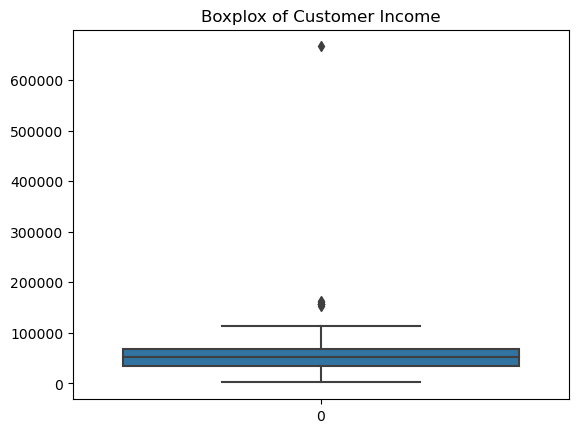

In [20]:
plt.title('Boxplox of Customer Income')
sns.boxplot(data['Income']);

as we can see, customer income contain outlier, let remove this ourlier

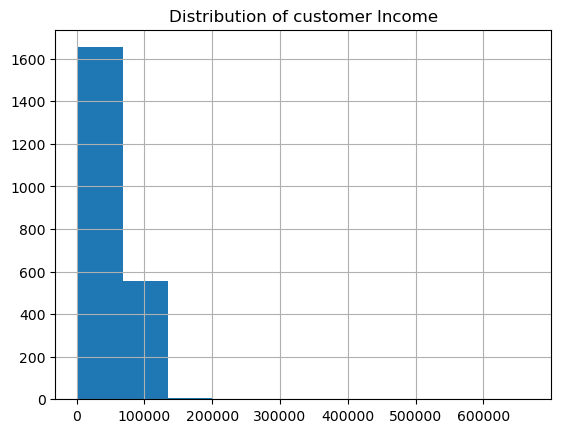

In [21]:
plt.title('Distribution of customer Income')
data['Income'].hist();

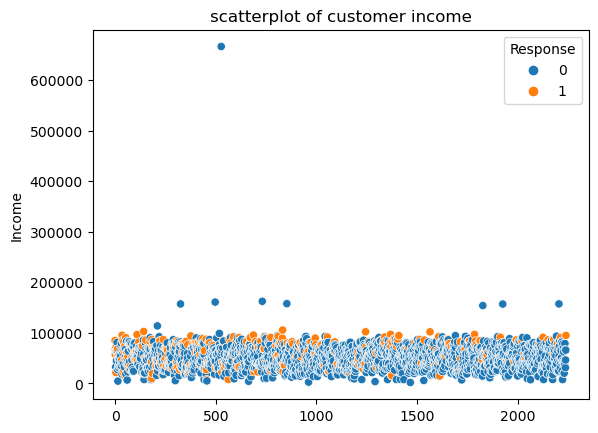

In [22]:
plt.title('scatterplot of customer income')
sns.scatterplot(data = df, x = df.index, y = 'Income', hue = 'Response');

Most of the customer income is 200K and below, as we can see there is one outlier data point

### Customer Acceptance Rate in Past Campain

In [23]:
label = (round(df['Response'].value_counts(normalize = True),2)*100).astype('str')+'%'
label

Response
0    85.0%
1    15.0%
Name: proportion, dtype: object

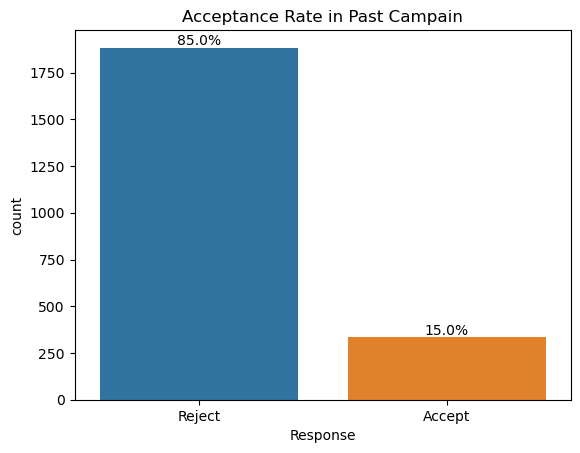

In [24]:
plt.title('Acceptance Rate in Past Campain')
g = sns.countplot(data = df, x = 'Response')
g.bar_label(g.containers[0], labels =label.values)
plt.xticks([0,1],['Reject','Accept']);

Campain in the past has a low acceptance rate of  15% . And we can say the distribution of the response varible is imbalance

### Customer Education

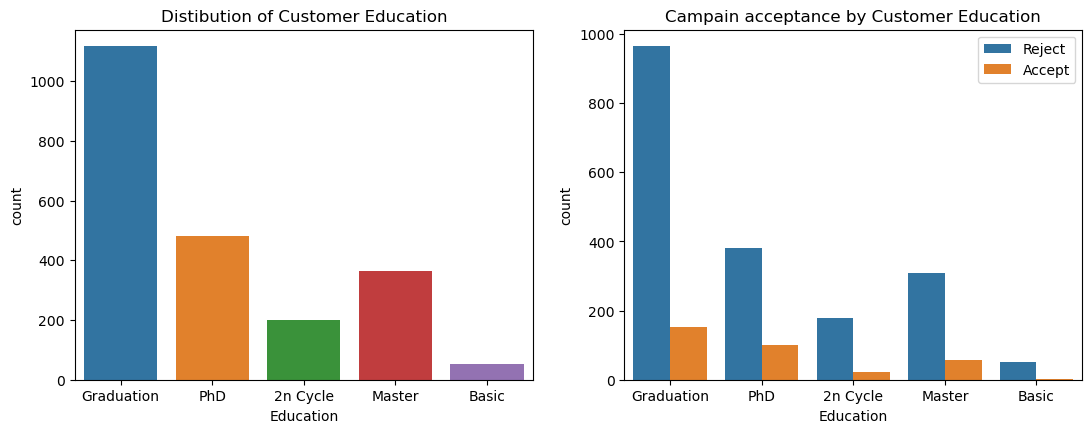

In [25]:
plt.figure(figsize = (13,10))
plt.subplot(221)
sns.countplot(data = df, x = 'Education')
plt.title('Distibution of Customer Education')
plt.subplot(222)
plt.title('Campain acceptance by Customer Education')
g = sns.countplot(data = df, x = 'Education', hue = 'Response')
plt.legend(['Reject','Accept']);

In [26]:
pd.crosstab(df['Education'], df['Response'], normalize= 'index') * 100 

Response,0,1
Education,,
2n Cycle,89.000000,11.000000
Basic,96.296296,3.703704
Graduation,86.379928,13.620072
Master,84.657534,15.342466
PhD,79.002079,20.997921


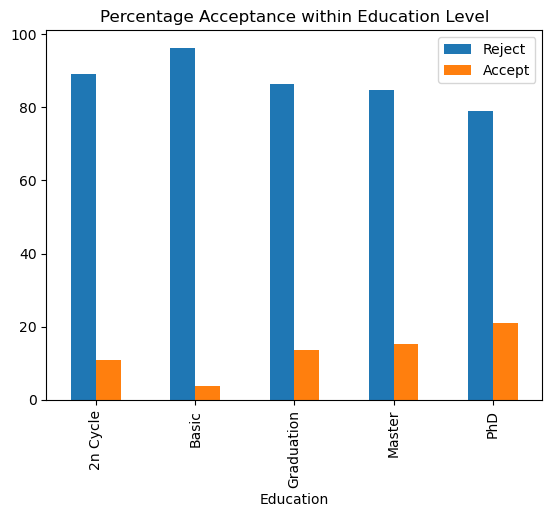

In [27]:

(pd.crosstab(df['Education'], df['Response'], normalize= 'index') * 100 ).plot(kind = 'bar')
plt.title('Percentage Acceptance within Education Level')
plt.legend(['Reject','Accept']);

Overall Accecptance is higher in Graduate followed by PhD and Master, but within each education group the percentage acceptance is highest in PhD , Master and Graduate. there is possitive correlation between education level and Acceptance rate

### Customer Marital Status and Campain Acceptance

In [28]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

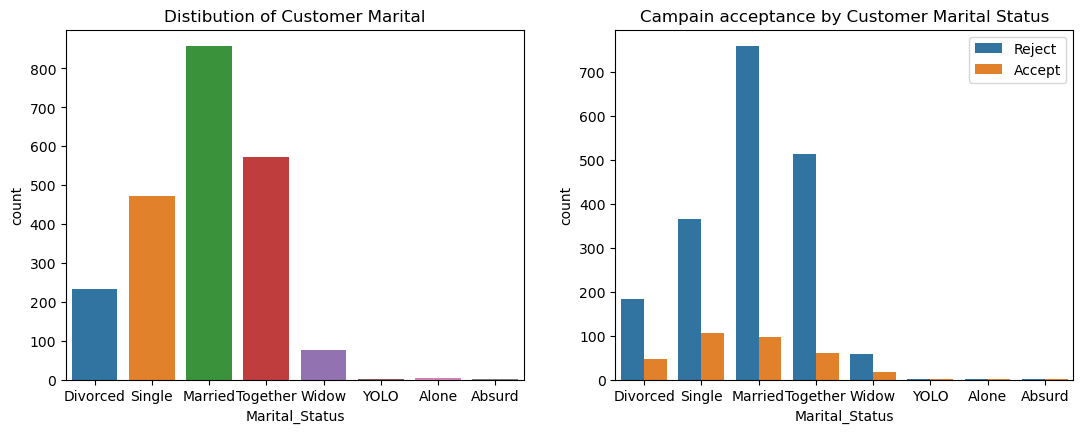

In [29]:
plt.figure(figsize = (13,10))
plt.subplot(221)
sns.countplot(data = df, x = 'Marital_Status')
plt.title('Distibution of Customer Marital')
plt.subplot(222)
plt.title('Campain acceptance by Customer Marital Status')
g = sns.countplot(data = df, x = 'Marital_Status', hue = 'Response')
plt.legend(['Reject','Accept']);

 Campain acceptance is highest among married and singles. Alone , YOLO , Absurd  marital status represent a very small proportion of the dataset less than 0.005%, we will conver them as simply single

In [30]:
## Replace Alone , YOLO , Absurd with single
df.replace(to_replace = ['Alone','YOLO','Absurd'], value = 'Single',inplace = True)

In [31]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: count, dtype: int64

### Complaint  by Campain Acceptance

In [32]:
df['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

In [33]:
pd.crosstab(df['Complain'],df['Response'])

Response,0,1
Complain,,
0,1865,330
1,18,3


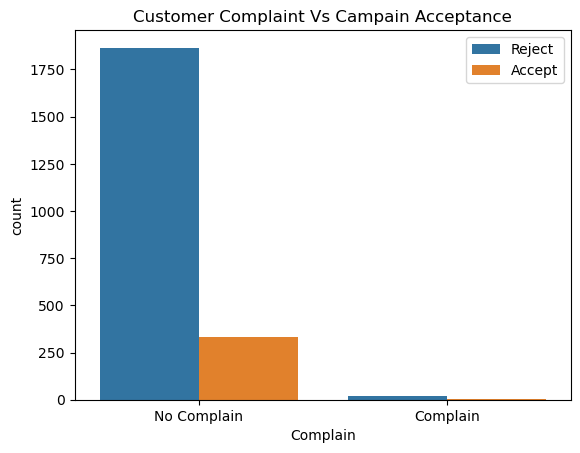

In [34]:
sns.countplot(data = df, x = 'Complain', hue = 'Response')
plt.legend(['Reject','Accept']);
plt.xticks([0,1],['No Complain','Complain'])
plt.title('Customer Complaint Vs Campain Acceptance');

Customer who do not complain accept the campain more than thos that complain

#### Purchase Channel Analysis

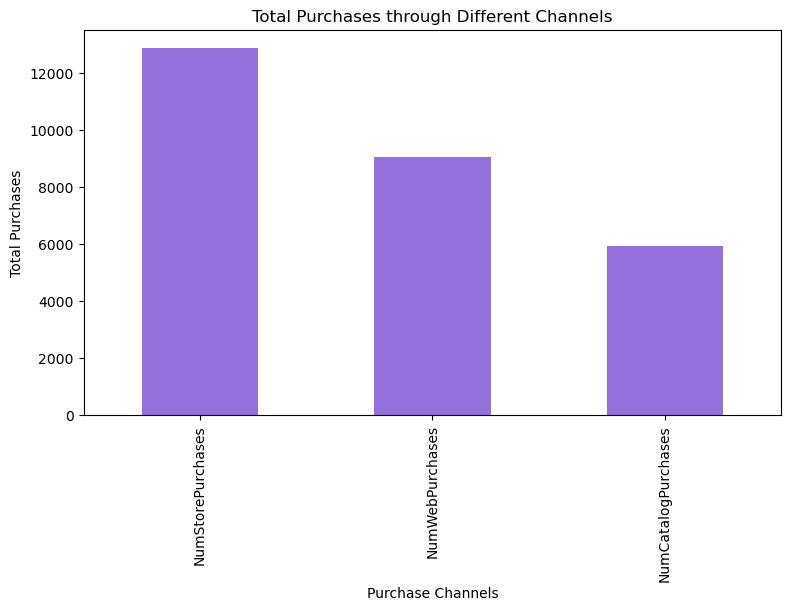

In [35]:
channels_columns = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
df[channels_columns].sum().plot(kind='bar', figsize=(9,5), color ='mediumpurple')
plt.title('Total Purchases through Different Channels')
plt.xlabel('Purchase Channels')
plt.ylabel('Total Purchases');

Store purche is highest among the purchase channels

### Purchase Behaviour Analysis

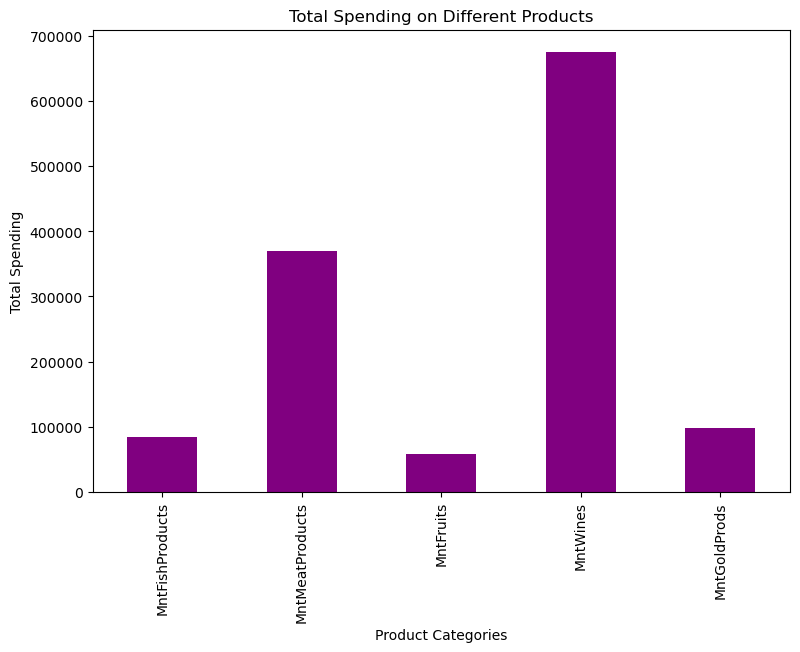

In [36]:
products_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines', 'MntGoldProds']
df[products_columns].sum().plot(kind='bar', figsize=(9, 6), color = 'purple')
plt.title('Total Spending on Different Products')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending');

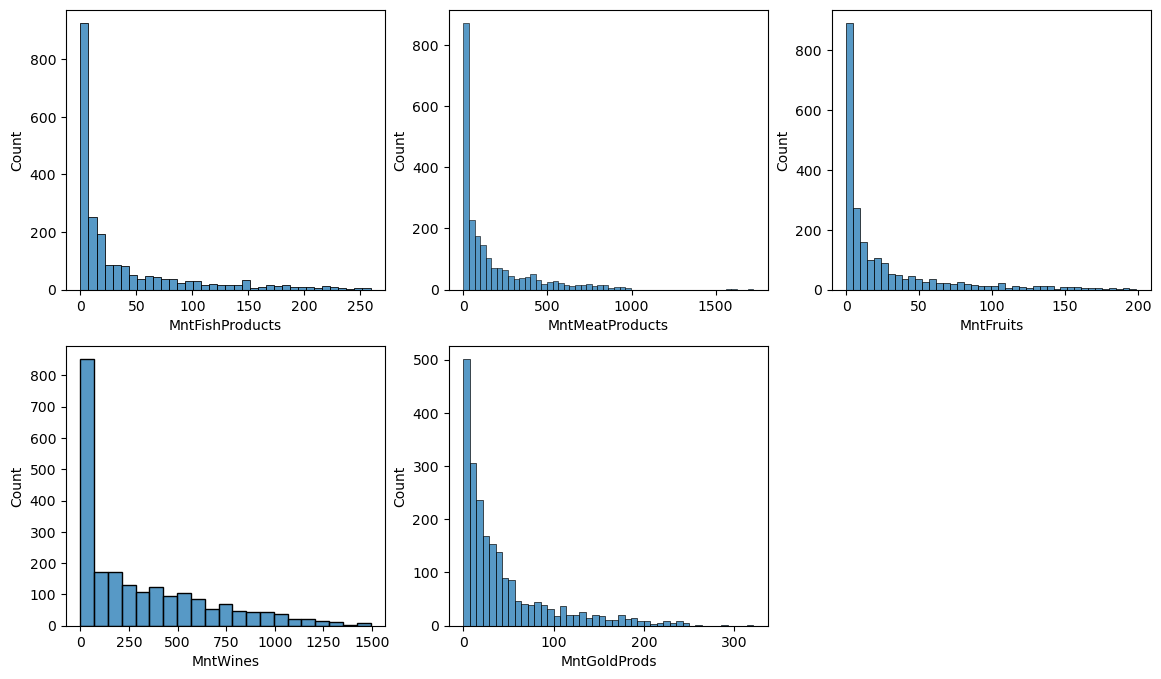

In [37]:
products_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines', 'MntGoldProds']
plt.figure(figsize = (14,8))
plt.title('Distribution of of Amount spent on Different Products')
for i , feature in enumerate(products_columns):
    plt.subplot(2,3,i+1)
    sns.histplot(data[feature])
    plt.xlabel(feature)
    

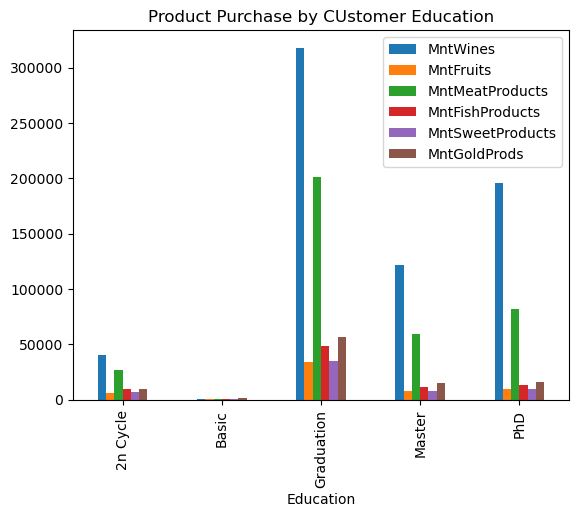

In [38]:
df[['Education','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases']].groupby('Education')[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().plot(kind='bar')
plt.title('Product Purchase by CUstomer Education');

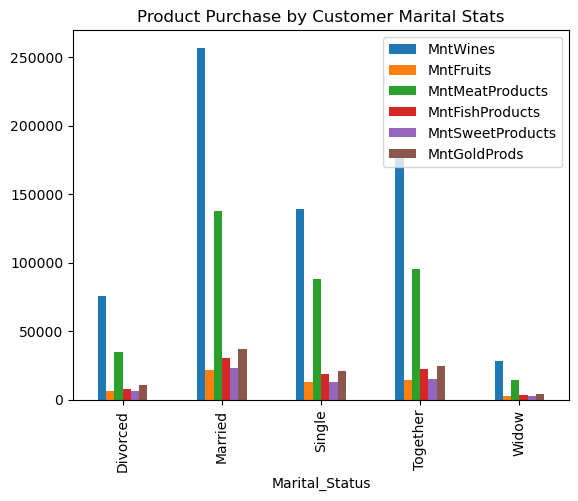

In [39]:
df[['Marital_Status','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases']].groupby('Marital_Status')[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum().plot(kind='bar')
plt.title('Product Purchase by Customer Marital Stats');

Customers are spending more on Wine and meat products

### Custome kids and teen and acceptance

In [40]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [41]:
pd.crosstab(df['Kidhome'], df['Response'], normalize = 'index')

Response,0,1
Kidhome,,
0,0.827747,0.172253
1,0.875986,0.124014
2,0.956522,0.043478


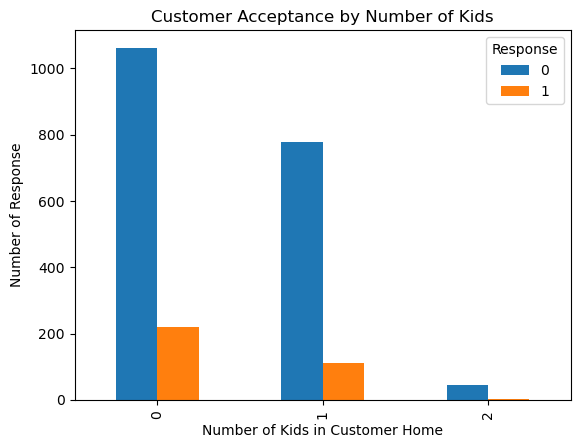

In [42]:
pd.crosstab(df['Kidhome'], df['Response']).plot(kind = 'bar')
plt.xlabel('Number of Kids in Customer Home')
plt.ylabel('Number of Response')
plt.title('Customer Acceptance by Number of Kids');

As the number of kids increases customer acceptance decreases

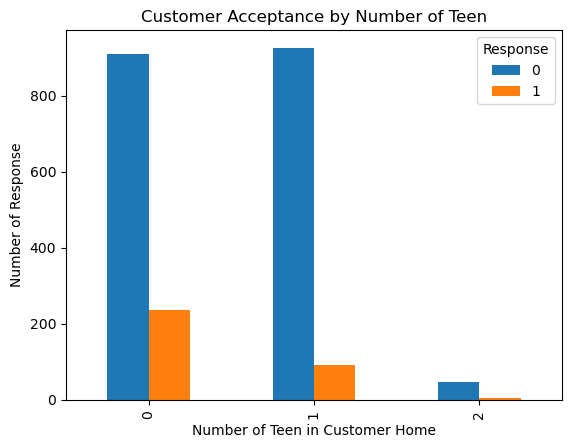

In [43]:
pd.crosstab(df['Teenhome'], df['Response']).plot(kind = 'bar')
plt.xlabel('Number of Teen in Customer Home')
plt.ylabel('Number of Response')
plt.title('Customer Acceptance by Number of Teen');

As the number of Teen increases customer acceptance decreases

### Recency Distribution

In [44]:
df['Recency'].describe()

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

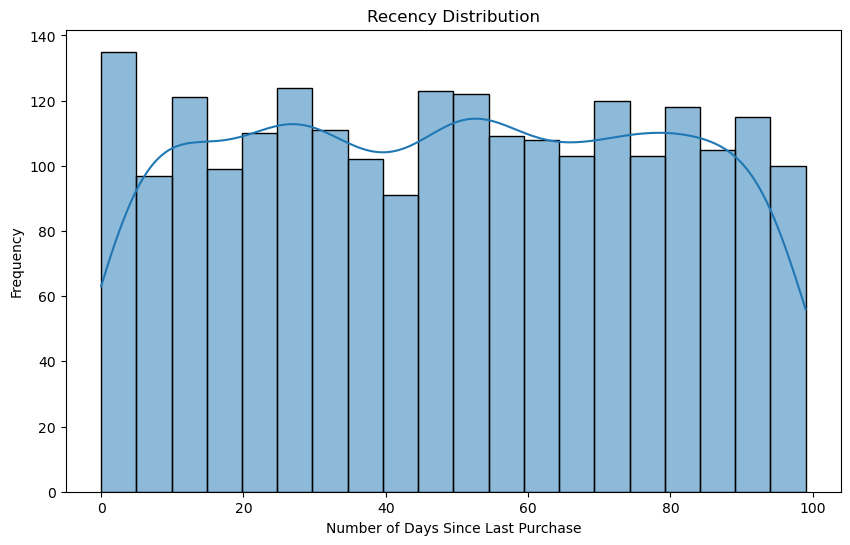

In [45]:
#Recency Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Number of Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

Customers have an average recency of 49 days with most customer coming back to buy product after 28 days of first purchase

### Pearson Correlation among Features

In [46]:
df.corr(numeric_only = True)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Year_Birth,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,0.023692,-0.030407
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.133047,-0.027225
Kidhome,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,-0.077909,0.040978
Teenhome,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.153901,0.003307
Recency,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.199766,0.013637
MntWines,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.246299,-0.039470
MntFruits,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.122443,-0.005324
MntMeatProducts,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.237746,-0.023782
MntFishProducts,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,0.108145,-0.021220
MntSweetProducts,-0.020204,0.440744,-0.378026,-0.163056,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,0.495136,0.455225,-0.422371,0.116170,-0.022641


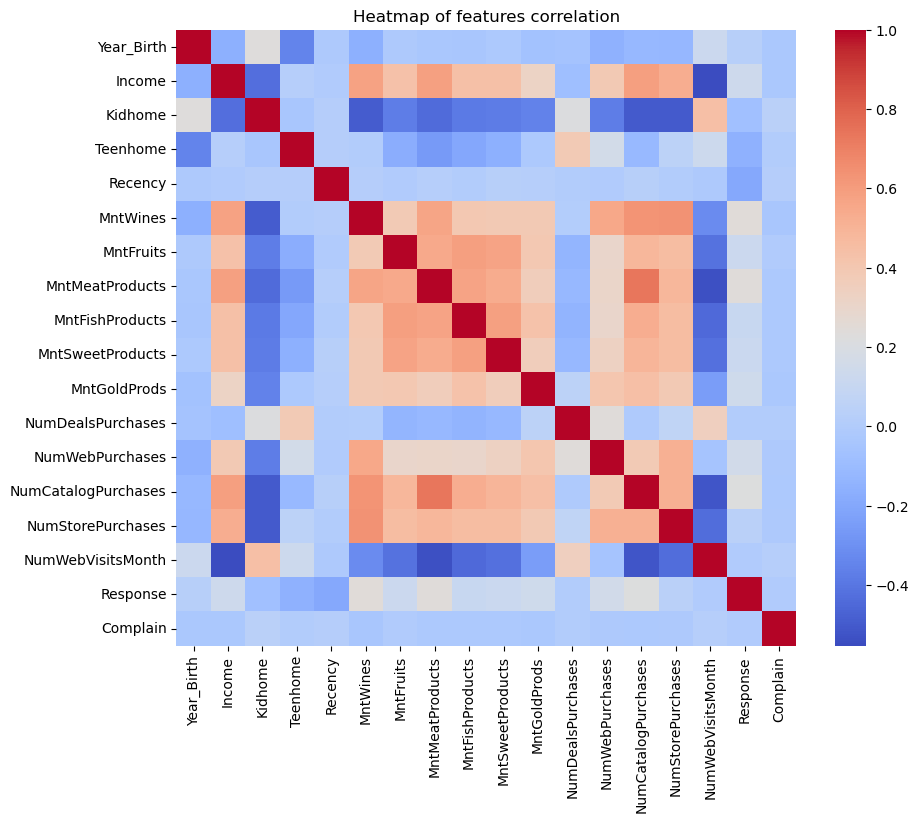

In [47]:
plt.figure(figsize = (10,8))
plt.title('Heatmap of features correlation')
sns.heatmap(data =df.corr(numeric_only = True), cmap = 'coolwarm');

## <a id='data-eng'>5. Feature Engineering </a>                                                      

The year of birth of customer is given in the data, but it is more appropriate to use the customer age
    for this am taking reference to todays date, the number of days the customer spends in the company will be used

In [48]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [49]:
import datetime as dt

In [50]:
df['year'] = pd.to_datetime(dt.date.today())

In [51]:
df['year'] 

0      2024-01-26
1      2024-01-26
2      2024-01-26
3      2024-01-26
4      2024-01-26
          ...    
2235   2024-01-26
2236   2024-01-26
2237   2024-01-26
2238   2024-01-26
2239   2024-01-26
Name: year, Length: 2216, dtype: datetime64[ns]

In [52]:
 df['Enrollment_Duration']  =  (df['year'] - df['Dt_Customer']).dt.days.astype(int)
df['customer_age'] = dt.date.today().year -df['Year_Birth']

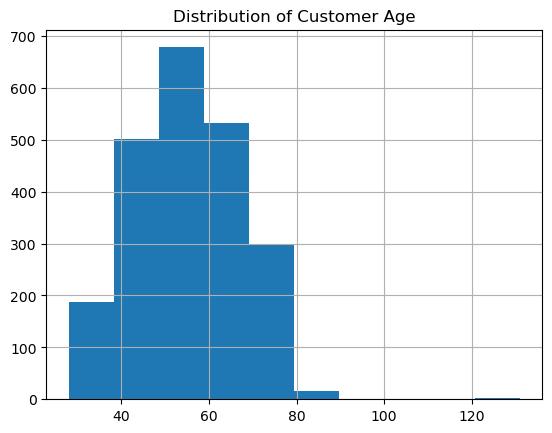

In [53]:
plt.title('Distribution of Customer Age')
df['customer_age'].hist();

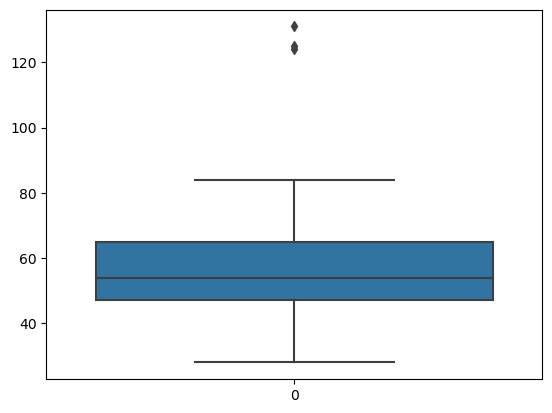

In [54]:
sns.boxplot(df['customer_age'] );

In [55]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,year,Enrollment_Duration,customer_age
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,2024-01-26,3511,54
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,2024-01-26,3512,63
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,2024-01-26,3545,66
3,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,2024-01-26,3369,57
4,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,2024-01-26,3462,35


In [56]:
## drop irrelevant columns
df.drop(['Year_Birth','Dt_Customer','year'], axis =1, inplace = True)

## <a id='data-out'> 6. Outlier Detection and Removal </a>

In [57]:
### Outlier removal
df = df.loc[df['Income'] <300000]
df = df.loc[df['customer_age'] < 120]

In [58]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Enrollment_Duration,customer_age
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,3511,54
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,3512,63
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,3545,66
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,3369,57
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,3462,35


In [59]:
data = df.copy()

In [60]:
### resevered incase of any need to come back
data_df = data.copy()

## <a id='data-prep'> 7. Data Preprocessing </a>

#### DownSampling

Due the the imbalance nature of our dataset, i will downsample the majority class (**reject**)

In [61]:
#import module for down sampling
from sklearn.utils import resample

In [62]:
reject_df = df[df['Response'] == 0]
accept_df = df[df['Response'] == 1]

In [63]:
len(accept_df)

333

In [64]:
len(reject_df)

1879

In [65]:
resample_df = resample(reject_df, replace = True, n_samples = len(accept_df), random_state = 42)

In [66]:
resample_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Enrollment_Duration,customer_age
1407,PhD,Single,50729.0,1,1,62,239,13,143,45,4,52,9,6,2,7,6,0,0,4007,66
1778,Graduation,Together,54178.0,0,1,79,135,9,39,4,0,7,1,2,2,5,2,0,0,3657,57
1100,Basic,Together,22390.0,0,0,49,0,1,4,15,1,5,1,1,0,2,7,0,0,3749,55
1593,Graduation,Together,23228.0,1,0,71,13,2,18,6,1,0,2,2,0,3,8,0,0,3652,55
1413,Graduation,Married,56775.0,0,1,62,614,35,160,58,35,35,2,5,8,10,5,0,0,4011,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,PhD,Together,83443.0,0,0,89,518,42,742,55,56,84,1,6,10,5,2,0,0,3678,52
733,2n Cycle,Divorced,41769.0,0,1,31,302,29,131,32,0,27,6,8,1,7,8,0,0,3999,69
477,PhD,Married,29791.0,1,0,21,14,0,6,0,0,0,2,2,0,3,5,0,0,3543,52
1112,Graduation,Together,54414.0,1,1,49,109,18,16,24,26,18,4,3,1,5,4,0,0,4020,61


In [67]:
df = pd.concat([resample_df,accept_df])

In [68]:
df.shape

(666, 21)

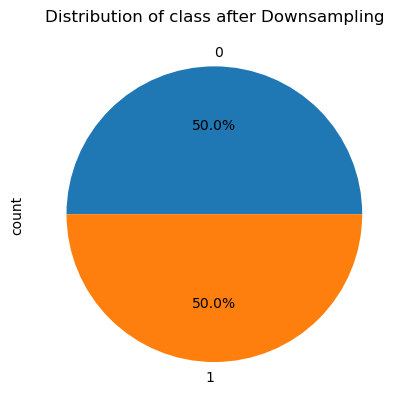

In [69]:
plt.title('Distribution of class after Downsampling')
df['Response'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

Now we have the same class instances in the dataset

### Categorical Feature encoding

In [70]:
df = pd.get_dummies(df,  drop_first = True, dtype = 'int')
#data = pd.get_dummies(data,  drop_first = True, dtype = 'int')

In [71]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Enrollment_Duration,customer_age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
1407,50729.0,1,1,62,239,13,143,45,4,52,9,6,2,7,6,0,0,4007,66,0,0,0,1,0,1,0,0
1778,54178.0,0,1,79,135,9,39,4,0,7,1,2,2,5,2,0,0,3657,57,0,1,0,0,0,0,1,0
1100,22390.0,0,0,49,0,1,4,15,1,5,1,1,0,2,7,0,0,3749,55,1,0,0,0,0,0,1,0
1593,23228.0,1,0,71,13,2,18,6,1,0,2,2,0,3,8,0,0,3652,55,0,1,0,0,0,0,1,0
1413,56775.0,0,1,62,614,35,160,58,35,35,2,5,8,10,5,0,0,4011,45,0,1,0,0,1,0,0,0


### Train Test Split

In [72]:
# Split data into output and input
X = df.drop('Response',axis = 1)
y = df['Response']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

<IPython.core.display.Javascript object>

In [369]:
# Split data for final testing
#X_ = data.drop('Response',axis = 1)
#y_ = data['Response']

# Split the data into training and test sets
#X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, stratify=y_, random_state=42)

<IPython.core.display.Javascript object>

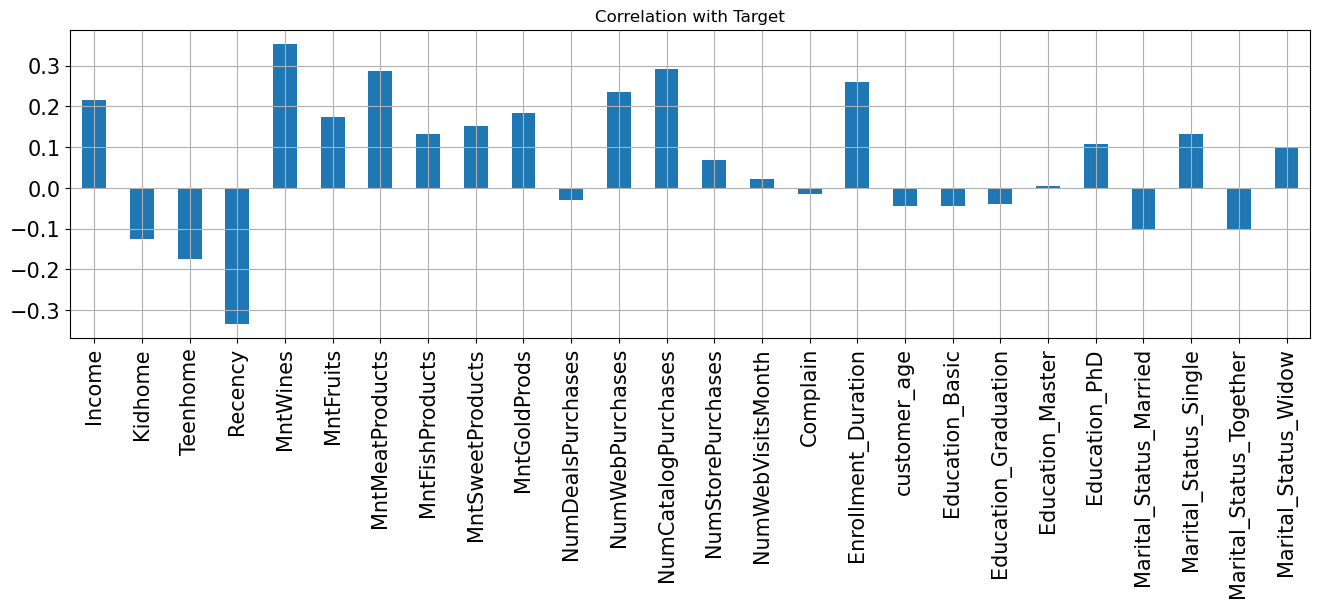

In [300]:
## plot correlation of features with 
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation of features with Target", fontsize = 15,
        rot = 90, grid = True);

## <a id = 'data-model'>8  Model Selection, Evaluation and Comparism </a>

At the initial stage we are going to fit the model on the dataset without standardization, and check performace using Kfold cross validation, since the model focused on capturing as much as many customer that will accept the offer, we will focus on model with high recall and also have a balance between other metrics

In [337]:
## create a list of classification model
models = [
    ('LogisticRegression',LogisticRegression()),
    ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),
    ('RandomForestClassifier',RandomForestClassifier()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('SVC',SVC()),   
    ('gbc',  GradientBoostingClassifier()),
    ('abc',  AdaBoostClassifier()),
    ('etc',  ExtraTreesClassifier()),
]

train_results= {}
accuracy_results = {}
confusion_results= {}
classificatoin_results = []

# define kfold number of split for cross validation
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
for name, model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy' )
    train_results[name] = np.mean(cv_result)
    
     # fit the model on testset
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    
    #evaluate the model
    accuracy_result = accuracy_score(y_test,pred_test)
    accuracy_results[name] = accuracy_result
    confusion = confusion_matrix(y_test,pred_test)
    confusion_results[name] = confusion
    classificatoin_results.append((name,classification_report(y_test,pred_test)))
    
    
#best model on training sets
print('\nTraining Accuracy result ')
for name, model_result in train_results.items():
    print(f"{name} : {model_result: .4f}")
    
best_model_train = max(train_results, key = train_results.get)
print(f"Best model on training : {best_model_train} with accuracy of {train_results[best_model_train] *100 }%")

#Best Model on test Set
print('\n Test accuracy result')
for name, model_test_result in accuracy_results.items():
    print(f"{name} : {model_test_result: .4f}")
    
best_model_test = max(accuracy_results, key = accuracy_results.get)
print(f"Best model on test: {best_model_test} with accuracy of {accuracy_results[best_model_test] *100 }%")


Training result 
LogisticRegression :  0.7144
LinearDiscriminantAnalysis :  0.8082
RandomForestClassifier :  0.8064
DecisionTreeClassifier :  0.7275
SVC :  0.6072
gbc :  0.8122
abc :  0.7971
etc :  0.8081
Best model on training : gbc with accuracy of 81.21593291404612%

 Test result
LogisticRegression :  0.7761
LinearDiscriminantAnalysis :  0.7463
RandomForestClassifier :  0.8060
DecisionTreeClassifier :  0.7463
SVC :  0.6493
gbc :  0.7612
abc :  0.7612
etc :  0.7910
Best model on test: RandomForestClassifier with accuracy of 80.59701492537313%


The best model on the test set is RandomForestClassifier , it also scrike an accuracy balance between the training set and test set

In [338]:
# confusion matrix and classifaction report of models
for name, confusion in confusion_results.items():
    print(f"{name} \n \n{confusion} \n")
for name , report in classificatoin_results:
    print(f"{name}\n")
    print(f"{report}\n")

LogisticRegression 
 
[[51 16]
 [14 53]] 

LinearDiscriminantAnalysis 
 
[[50 17]
 [17 50]] 

RandomForestClassifier 
 
[[52 15]
 [11 56]] 

DecisionTreeClassifier 
 
[[51 16]
 [18 49]] 

SVC 
 
[[53 14]
 [33 34]] 

gbc 
 
[[51 16]
 [16 51]] 

abc 
 
[[53 14]
 [18 49]] 

etc 
 
[[53 14]
 [14 53]] 

LogisticRegression

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        67
           1       0.77      0.79      0.78        67

    accuracy                           0.78       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.78      0.78      0.78       134


LinearDiscriminantAnalysis

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        67
           1       0.75      0.75      0.75        67

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75      0.75      0.75       13

#### Perform standardization and fit model

to further access the model, here i have standardize the input variable using StandardScaler from Sklearn libary and pipe it with the models using pipeline to avoid data leakage

In [339]:
models = [
    ('LogisticRegression',LogisticRegression()),
    ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),
    ('RandomForestClassifier',RandomForestClassifier()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('SVC',SVC()), 
    ('knn',KNeighborsClassifier()),
    ('gbc',  GradientBoostingClassifier()), 
    ('abc',  AdaBoostClassifier()),
    ('etc',  ExtraTreesClassifier()),
]

cv_results= {}
accuracy_results = {}
confusion_results = {}
classificatoin_results = []
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
for name, model in models:
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name,     model)
    ])
    cv_result = cross_val_score(model_pipeline, X_train, y_train, cv = kfold, scoring = 'accuracy' )
    cv_results[name] = np.mean(cv_result)
     # fit the model on testset
    model_pipeline.fit(X_train,y_train)
    pred_test = model_pipeline.predict(X_test)
    accuracy_result = accuracy_score(y_test,pred_test)
    accuracy_results[name] = accuracy_result
    confusion = confusion_matrix(y_test,pred_test)
    confusion_results[name] = confusion
    classificatoin_results.append((name,classification_report(y_test,pred_test)))
    
    
#best model on training sets
print('\nTraining CV result')
for name, model_result in cv_results.items():
    print(f"{name} : {model_result: .4f}")
    
best_model_train = max(cv_results, key = cv_results.get)
print(f"Best model on training : {best_model_train} with accuracy of {cv_results[best_model_train] *100 }%")

#Best Model on test Set
print('\n Test result')
for name, model_test_result in accuracy_results.items():
    print(f"{name} : {model_test_result: .4f}")
    
best_model_test = max(accuracy_results, key = accuracy_results.get)
print(f"Best model on test: {best_model_test} with accuracy of {accuracy_results[best_model_test] *100 }%")


Training CV result
LogisticRegression :  0.8101
LinearDiscriminantAnalysis :  0.8082
RandomForestClassifier :  0.8102
DecisionTreeClassifier :  0.7087
SVC :  0.7782
knn :  0.6765
gbc :  0.8215
abc :  0.7971
etc :  0.8155
Best model on training : gbc with accuracy of 82.15234102026555%

 Test result
LogisticRegression :  0.7388
LinearDiscriminantAnalysis :  0.7463
RandomForestClassifier :  0.7687
DecisionTreeClassifier :  0.7015
SVC :  0.7463
knn :  0.6866
gbc :  0.7612
abc :  0.7612
etc :  0.7910
Best model on test: etc with accuracy of 79.1044776119403%


In [340]:
for name, confusion in confusion_results.items():
    print(f"{name} \n \n{confusion} \n")
for name , report in classificatoin_results:
    print(f"{name}\n")
    print(f"{report}\n")

LogisticRegression 
 
[[50 17]
 [18 49]] 

LinearDiscriminantAnalysis 
 
[[50 17]
 [17 50]] 

RandomForestClassifier 
 
[[50 17]
 [14 53]] 

DecisionTreeClassifier 
 
[[47 20]
 [20 47]] 

SVC 
 
[[48 19]
 [15 52]] 

knn 
 
[[46 21]
 [21 46]] 

gbc 
 
[[51 16]
 [16 51]] 

abc 
 
[[53 14]
 [18 49]] 

etc 
 
[[52 15]
 [13 54]] 

LogisticRegression

              precision    recall  f1-score   support

           0       0.74      0.75      0.74        67
           1       0.74      0.73      0.74        67

    accuracy                           0.74       134
   macro avg       0.74      0.74      0.74       134
weighted avg       0.74      0.74      0.74       134


LinearDiscriminantAnalysis

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        67
           1       0.75      0.75      0.75        67

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75 

most of the  model do not benefit much from standardized data, let tune the hyper parameter of  RandomForestClassifier  that performed better compared to other models on the test set without standardization

 **Hyper parameter Tuning for ExtraTreesClassifier**

In [341]:

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier  ()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Print the best parameters and classification report
print("Best Parameters:", best_params)
print("Accuracy :",accuracy_score(y_test,y_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy : 0.7686567164179104

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        67
           1       0.76      0.79      0.77        67

    accuracy                           0.77       134
   macro avg       0.77      0.77      0.77       134
weighted avg       0.77      0.77      0.77       134



RandomForestClassifier  seem not benefit from tuning, here we will leave it with the default parameters, let  apply emsemble model to the data and futher evaluate the model

### Stacking
Stacking combines the predictions of multiple models by training a meta-model on their outputs.
Base models make predictions on the input data, and their predictions are used as features for training the meta-model.
Stacking allows models with different strengths and weaknesses to complement each other.

In [346]:
# Create individual classifiers
classifier1 = ExtraTreesClassifier(random_state=42)
classifier2 = RandomForestClassifier(random_state=42)

# Create a StackingClassifier 
stacking_classifier = StackingClassifier(estimators=[
                       ('rf', classifier1),
                      ('etc', classifier2)
], final_estimator = RandomForestClassifier() )


# Train the ensemble model on the training set
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.8060
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        67
           1       0.80      0.82      0.81        67

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134



Stacking ensemble model perform excellently well than other model, with accuracy of 80.60% and strike a better balance between precision  and recall

### Voting


Voting combines the predictions of multiple models by voting (for classification).


In [77]:
# Create individual classifiers
classifier4 = RandomForestClassifier( random_state=42)
classifier3 = ExtraTreesClassifier(random_state = 42)

# Create a VotingClassifier with soft voting
voting_classifier = VotingClassifier(estimators=[

    ('etc', classifier3),
    ('rf', classifier4),
], voting='soft')

# Evaluate the Voting Classifier using cross-validation
cv_scores = cross_val_score(voting_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the accuracy of the Voting Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy on Test Set: {accuracy}")
classification = classification_report(y_test, y_pred)
print(classification)


Cross-Validation Scores: [0.85046729 0.8317757  0.86792453 0.79245283 0.77358491]
Mean Accuracy: 0.8232410509610298
Voting Classifier Accuracy on Test Set: 0.8134328358208955
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        67
           1       0.81      0.82      0.81        67

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134



In [79]:
confusion_matrix(y_test, y_pred)

array([[54, 13],
       [12, 55]], dtype=int64)

Voting classifier perform the best so far and this will be our final model for predicting customer who will accept the gold membership offer

## <a id = 'data-feat'> 9. Feature Importances Analysis </a>

In [348]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [351]:
df_feat= pd.DataFrame(sorted(zip(X_test.columns,model.feature_importances_)), columns = ['Features', 'Values']).sort_values(by ='Values', ascending = False)

In [353]:
df_feat.head()

,Features,Values
23,Recency,0.133337
17,MntWines,0.119121
5,Enrollment_Duration,0.100789
14,MntGoldProds,0.092090
15,MntMeatProducts,0.076220


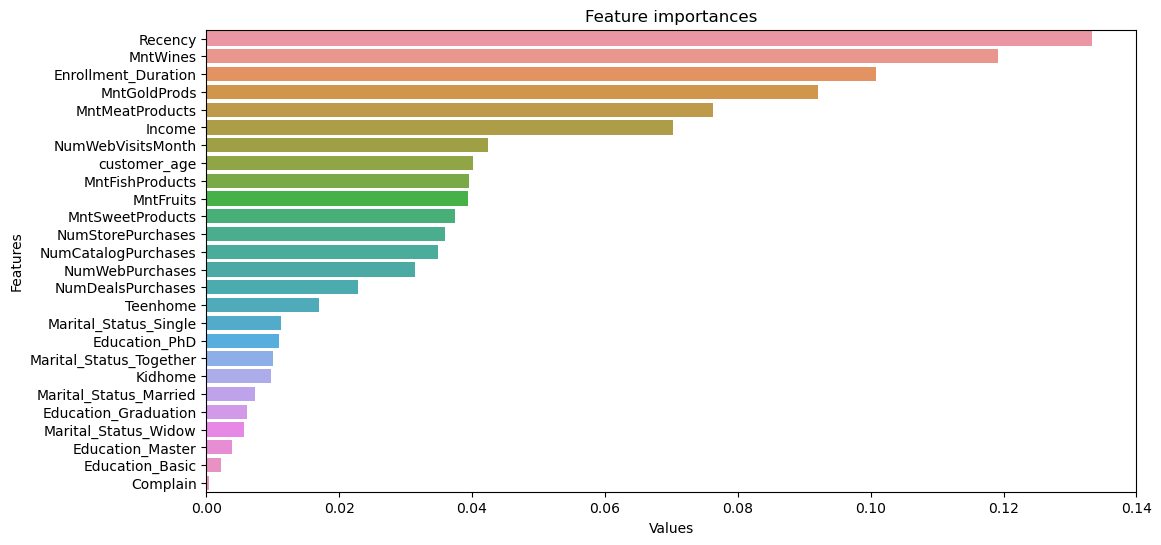

In [357]:
plt.figure(figsize = (12,6))
sns.barplot(data = df_feat, y = 'Features', x = 'Values')
plt.title('Feature importances');

It's evident from the bar graph that certain key features play a significant role in our prediction model. Notably, customer recency (the period between today and the previous purchase), the amount spent by the customer, the enrollment date, and income emerge as some of the most influential factors in predicting customer responses. These findings emphasize the importance of these specific features in understanding and forecasting customer behavior related to gold membership acceptance.

## <a id = 'data-con'> 10. Conclusion </a>

The voting classifier has demonstrated superior performance in predicting customers who are likely to accept the gold membership offer. Therefore, we will adopt it as our final model. Moving forward, we will consider aspects such as model interpretability, documentation, deployment planning, monitoring, maintenance, feedback loops, model explainability, security considerations, testing and validation, and communication. These steps are essential for a smooth transition to deployment and for ensuring the ongoing success and improvement of the predictive model.
![](votingclassifier.png)

**`Job Moses Ubeh`**

[Return to the top](#home)